   student_id  age gender  previous_gpa  study_hours_per_week  \
0           1   18      M           3.2                    15   
1           2   19      F           3.8                    20   
2           3   17      M           2.5                     8   
3           4   18      F           3.5                    18   
4           5   19      M           2.8                    12   

   attendance_rate  family_income parent_education  \
0             0.85          45000         Bachelor   
1             0.92          65000           Master   
2             0.70          35000      High School   
3             0.88          55000         Bachelor   
4             0.75          40000      High School   

   extracurricular_activities  tutoring_hours  sleep_hours  stress_level  \
0                           2               0            7             3   
1                           1               2            8             2   
2                           0               0           

c:\Users\anant\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anant\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anant\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

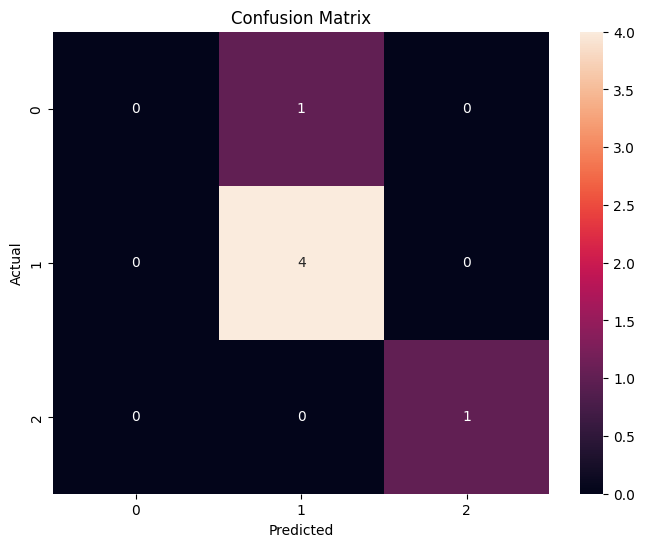

Predict your result
Predicted Stress Level: 1


In [ ]:
#importing libraries sucessfully 
import pandas as pd #importing pandas for data manipulation
from sklearn.preprocessing import LabelEncoder #importing LabelEncoder for encoding categorical variables
from sklearn.model_selection import train_test_split #importing train_test_split for splitting the dataset
from sklearn.linear_model import LogisticRegression #importing LogisticRegression for building the model
from sklearn.metrics import classification_report, confusion_matrix #importing metrics for evaluating the model
from sklearn.preprocessing import StandardScaler #importing StandardScaler for feature scaling
import matplotlib.pyplot as plt #importing matplotlib for data visualization
import seaborn as sns #importing seaborn for advanced data visualization

#Loading the dataset 
data = pd.read_csv("student_success_predictor.csv") #As the model is csv we use read_csv function 
print(data.head()) #head() function is used to display the first 5 rows of the dataset

#Exploratory Data Analysis (EDA)
print("dataset shape") #printing the shape of the dataset
print(f"rows: {data.shape[0]}, columns: {data.shape[1]}") #printing number of rows and columns

#checking for data types and missing values
print("dataset information",data.info()) #printing dataset information

#summary statistics
print("summary statistics",data.describe(include='all')) #printing summary statistics of the dataset

#checking for missing values
print("Missing values ",data.isnull().sum()) #printing the number of missing values in each column

#Data preprocessing 
le = LabelEncoder() #initialising Labelencoder

#Encoding categorical values
data['student_id'] = le.fit_transform(data['student_id']) #encoding student_id column
data['stress_level'] = le.fit_transform(data['stress_level']) #encoding stress_level column

#Displaying the dataset after encoding 
print("After encoding")
#printing the first 5 rows of the dataset after encoding
print(data.head())

#Feature selection and scaling
features = ['attendance_rate','previous_gpa'] #selecting features for the model
scaler = StandardScaler() #initialising StandardScaler
data_scaled = data.copy() #creating a copy of the dataset for scaling
data_scaled[features] = scaler.fit_transform(data[features]) #scaling the selected features

#Model building and validation
x = data_scaled[features] #independent variables
y = data_scaled['stress_level'] #dependent variable

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #splitting the dataset using train_test_split
model = LogisticRegression() #initialising LogisticRegression model
model.fit(X_train, y_train) #fitting the model on training data

#Making predictions on the test set 
Y = model.predict(X_test) #predicting the stress level on dataset 

#Evaluating the model 
print("Classification Report")  #printing classification report
print(classification_report(y_test, Y)) #displaying classification report

#Visualizing the confusion matrix
print("Confusion Matrix") #printing confusion matrix
print(confusion_matrix(y_test, Y)) #displaying confusion matrix

#Plotting the confusion matrix 
plt.figure(figsize=(8,6)) #setting figure size
sns.heatmap(confusion_matrix(y_test, Y), annot=True, fmt='d') #plotting heatmap for confusion matrix
plt.xlabel('Predicted') #setting x-axis label
plt.ylabel('Actual') #setting y-axis label
plt.title('Confusion Matrix') #setting title
plt.show() #displaying the graph
#Predicting new data
print("Predict your result")

#Using try and except block to handle user input and errors
try:
    attendance_rate = float(input("Enter attendance rate (0-100): ")) 
    previous_gpa = float(input("Enter previous GPA (0.0-4.0): "))

    input_data = pd.DataFrame([[attendance_rate, previous_gpa]], columns=features)
    input_data[features] = scaler.transform(input_data[features])

    prediction = model.predict(input_data)
    stress_level = le.inverse_transform(prediction)

    print(f"Predicted Stress Level: {stress_level[0]}")
except Exception as e:
    print(f"Error in input: {e}")